# Quantification of Human Background

10 genes were chosen to quantify human background.

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px

## Human gene coverage

In [37]:
idbd_coeff = [1.025813761718345, 10.195966838524328] # slope, intercept

In [38]:
coverage = pd.read_csv('coverage_stats_all_samples.txt', sep='\t')
coverage = coverage.rename(columns={'accession': 'Accession'})
coverage.head()

,Accession,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean
0,IDBD-D100464,7.137423,12.840228,0.000000,12.977531
1,IDBD-D100376,1149.271131,1610.919670,445.421051,1690.888964
2,IDBD-D100380,464.543120,679.541705,0.000000,726.837851
3,IDBD-D100381,669.737102,979.465719,0.000000,1033.378447
4,IDBD-D100382,750.383770,1093.596359,0.000000,1164.950251


## Normalize coverage to IC counts

In [39]:
ic_counts = pd.read_csv('../../arup_urine_samples_ge_study/ge_distribution/Normalized_IC_Counts.csv', index_col=0)
ic_counts.head()

,Accession,Ctrl Count,Normalized IC,Total Reads,Organism Read Count,Quantification,Median Coverage,Mean Coverage,Coverage Q1,Detection,log Quantification
0,IDBD-D100387,9526,14129.313327,6742012,6707.0,7.499367e+07,763.0,702.263789,613.5,TP,18.132914
1,IDBD-D100388,8693,16315.062953,5328205,4175.0,5.352200e+07,483.0,444.992806,394.0,TP,17.795603
2,IDBD-D100389,16631,26856.438601,6192556,7460.0,4.281944e+07,893.0,805.960831,655.0,TP,17.572503
3,IDBD-D100390,5756,9461.803230,6083407,6912.0,6.781667e+07,868.0,698.164668,467.0,TP,18.032319
4,IDBD-D100391,246,431.114856,5706136,126.0,7.831718e+07,13.0,13.011200,11.0,TP,18.176278


In [40]:
coverage_with_counts = coverage.merge(ic_counts[['Accession', 'Ctrl Count']], on='Accession', how='inner')
coverage_with_counts = coverage_with_counts.set_index('Accession')
coverage_with_counts.head()

,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean,Ctrl Count
Accession,,,,,
IDBD-D100464,7.137423,12.840228,0.000000,12.977531,7800
IDBD-D100376,1149.271131,1610.919670,445.421051,1690.888964,79
IDBD-D100380,464.543120,679.541705,0.000000,726.837851,1779
IDBD-D100381,669.737102,979.465719,0.000000,1033.378447,7911
IDBD-D100382,750.383770,1093.596359,0.000000,1164.950251,1275


In [41]:
coverage_norm = coverage_with_counts.copy()
coverage_norm.loc[:, 'mean_geomean':'median_nonzero_geomean'] = \
    coverage_norm.loc[:, 'mean_geomean':'median_nonzero_geomean'].div(coverage_norm['Ctrl Count'], axis=0)
coverage_norm = coverage_norm.drop(columns='Ctrl Count')
coverage_norm = np.log10(coverage_norm)
coverage_norm.head()

/Users/jmontgomery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log10



,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean
Accession,,,,
IDBD-D100464,-3.038553,-2.783522,-inf,-2.778903
IDBD-D100376,1.162795,1.309447,0.751144,1.330488
IDBD-D100380,-0.583150,-0.417960,-inf,-0.388738
IDBD-D100381,-1.072327,-0.907242,-inf,-0.883972
IDBD-D100382,-0.230227,-0.066653,-inf,-0.039203


## Calculate GE/ml from coverage using 16S standard curve model

In [42]:
ge = coverage_norm.copy()
ge = idbd_coeff[0] * ge + idbd_coeff[1] 

In [43]:
ge.head()

,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean
Accession,,,,
IDBD-D100464,7.078977,7.340592,-inf,7.345330
IDBD-D100376,11.388778,11.539215,10.966500,11.560800
IDBD-D100380,9.597764,9.767218,-inf,9.797194
IDBD-D100381,9.095959,9.265305,-inf,9.289176
IDBD-D100382,9.959797,10.127593,-inf,10.155752


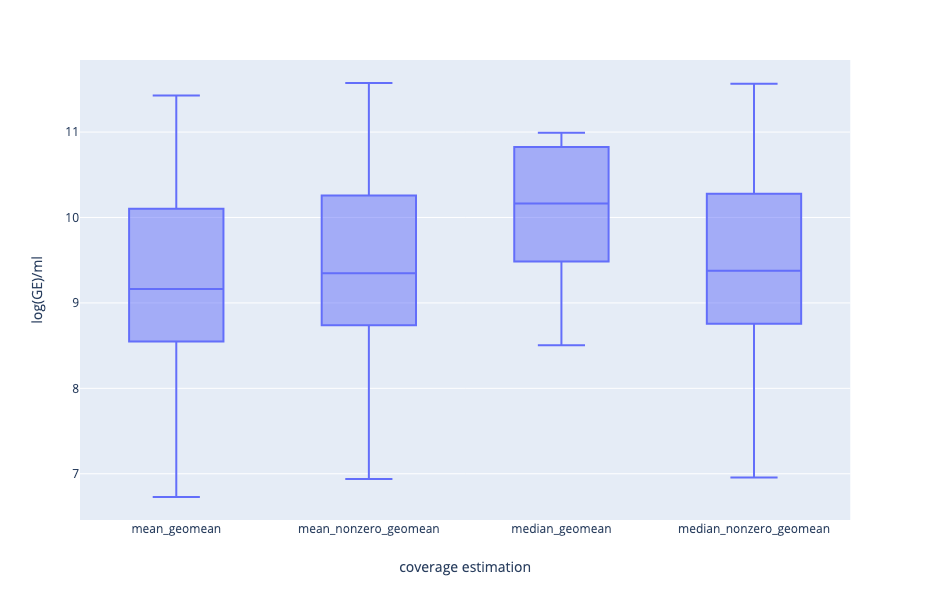

In [44]:
ge_melt = pd.melt(ge, var_name='coverage estimation', value_name='log(GE)/ml')
px.box(ge_melt, y='log(GE)/ml', x='coverage estimation')

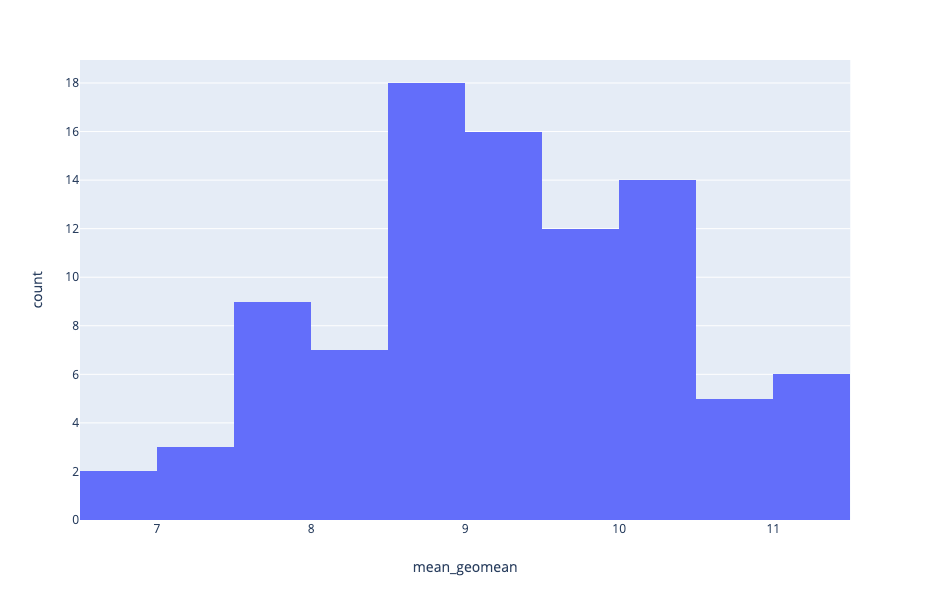

In [45]:
px.histogram(ge, x='mean_geomean')

## GE/ml and binner count correlation

In [46]:
compositions = pd.read_csv('20190927_arup_urine_samples_composition.csv', index_col=0)
compositions.head()

,Human,Bacteria,Virus,Parasite,Fungus,Unclassified
IDBD-D100376,92.149904,0.881119,0.000564,0.959848,0.008037,6.000527
IDBD-D100377,82.994607,10.116498,0.002259,0.548520,0.003442,6.334674
IDBD-D100378,91.646553,2.643605,0.011023,0.774996,0.005603,4.918220
IDBD-D100379,59.639469,34.365257,0.012832,0.476862,0.002225,5.503356
IDBD-D100380,41.570879,53.932139,0.032775,0.286891,0.001891,4.175426


In [47]:
joined = ge.join(compositions)
joined.head()

,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean,Human,Bacteria,Virus,Parasite,Fungus,Unclassified
Accession,,,,,,,,,,
IDBD-D100464,7.078977,7.340592,-inf,7.345330,0.950907,91.771102,0.060511,0.024421,0.005919,7.187140
IDBD-D100376,11.388778,11.539215,10.966500,11.560800,92.149904,0.881119,0.000564,0.959848,0.008037,6.000527
IDBD-D100380,9.597764,9.767218,-inf,9.797194,41.570879,53.932139,0.032775,0.286891,0.001891,4.175426
IDBD-D100381,9.095959,9.265305,-inf,9.289176,56.843790,36.310998,0.101981,0.424599,0.005058,6.313574
IDBD-D100382,9.959797,10.127593,-inf,10.155752,69.380616,25.572706,0.003782,0.505946,0.002870,4.534080


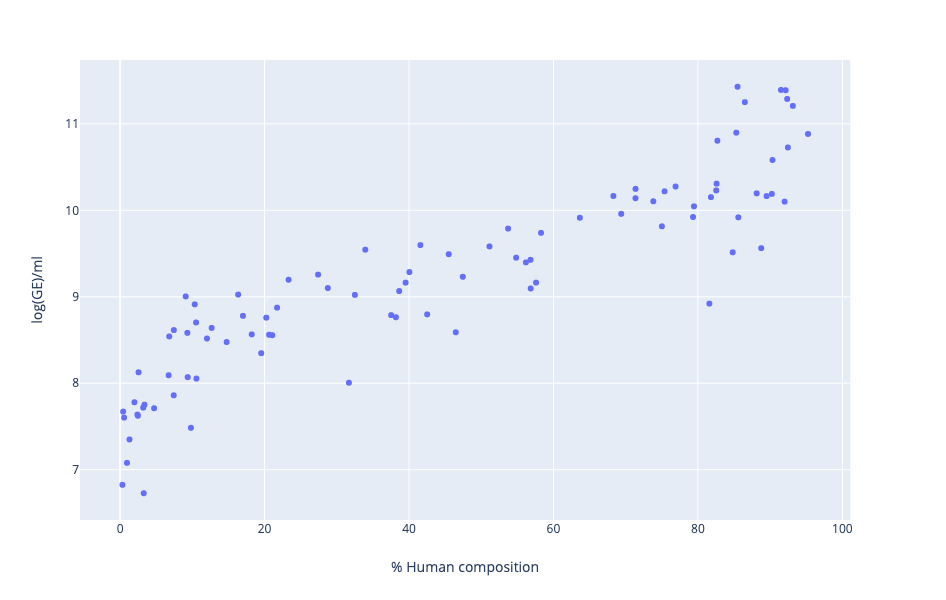

In [48]:
px.scatter(joined, x='Human', y='mean_geomean',
           labels={'mean_geomean': 'log(GE)/ml', 'Human': '% Human composition'})

## TP / FN 

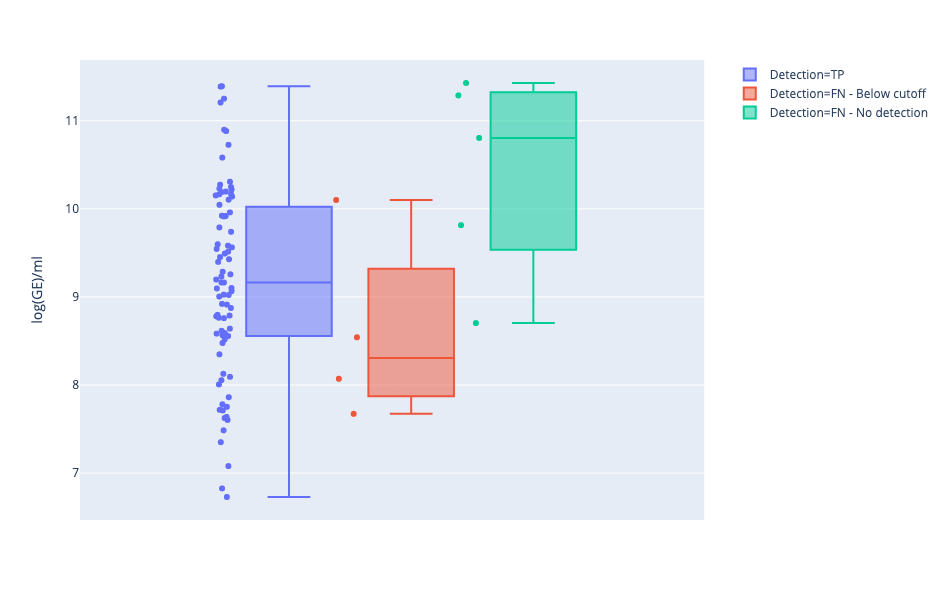

In [49]:
ge_with_detection = ge.join(ic_counts.set_index('Accession'))
px.box(ge_with_detection.reset_index(), y='mean_geomean', color='Detection',
       labels={'mean_geomean': 'log(GE)/ml'}, points='all',
       hover_data=['mean_geomean', 'Detection', 'Accession'])

### Join with culture results and bacterial quantifications for Robert

In [50]:
quantifications = ic_counts = pd.read_csv('../../arup_urine_samples_ge_study/ge_distribution/quantifications.csv', index_col=0)
quantifications = quantifications.set_index('Accession')
quantifications.head()

,IDBD #,Detected Organism,log(Genomic Equivalents)/ml,log(cfu/ml),Plate count log(cfu)/ml
Accession,,,,,
IDBD-D100387,IDbyDNA-5381,Escherichia coli,7.875025,5.0,6.041393
IDBD-D100388,IDbyDNA-5382,Escherichia coli,7.728532,5.0,5.698970
IDBD-D100389,IDbyDNA-5383,Escherichia coli,7.631641,5.0,6.146128
IDBD-D100390,IDbyDNA-5384,Escherichia coli,7.831336,5.0,6.342423
IDBD-D100391,IDbyDNA-5385,Escherichia coli,7.893857,5.0,5.602060


In [51]:
report = ge_with_detection.join(quantifications)

In [52]:
report.head()

,mean_geomean,mean_nonzero_geomean,median_geomean,median_nonzero_geomean,Ctrl Count,Normalized IC,Total Reads,Organism Read Count,Quantification,Median Coverage,Mean Coverage,Coverage Q1,Detection,log Quantification,IDBD #,Detected Organism,log(Genomic Equivalents)/ml,log(cfu/ml),Plate count log(cfu)/ml
Accession,,,,,,,,,,,,,,,,,,,
IDBD-D100464,7.078977,7.340592,-inf,7.345330,7800,18766.948901,4156243,2391.0,2.661404e+07,304.0,258.312550,183.0,TP,17.096949,IDbyDNA-5456,Escherichia coli,7.425111,5.0,6.041393
IDBD-D100376,11.388778,11.539215,10.966500,11.560800,79,135.091160,5847903,32.0,4.554576e+07,3.0,3.340000,2.0,TP,17.634228,IDbyDNA-5391,Escherichia coli,7.658448,5.0,5.511883
IDBD-D100380,9.597764,9.767218,-inf,9.797194,1779,3329.933519,5342449,3291.0,5.450863e+07,458.0,358.669065,169.0,TP,17.813870,IDbyDNA-5395,Escherichia coli,7.736465,5.0,5.954243
IDBD-D100381,9.095959,9.265305,-inf,9.289176,7911,13798.073711,5733409,162.0,2.611894e+06,19.0,17.939200,15.0,TP,14.775586,IDbyDNA-5396,Escherichia coli,6.416956,5.0,5.021189
IDBD-D100382,9.959797,10.127593,-inf,10.155752,1275,2472.616020,5156482,1817.0,1.254387e+08,223.0,196.444444,154.0,TP,18.647328,IDbyDNA-5397,Escherichia coli,8.098432,5.0,6.041393


In [53]:
report = report.rename(
    columns={
        'mean_geomean': 'Human quant, log(GE)/ml',
        'Ctrl Count': 'IC raw',
        'Normalized IC': 'IC normalized',
        'Total Reads': 'Postqual reads',
        'log(Genomic Equivalents)/ml': 'Organism quant, log(GE)/ml',
        'log(cfu/ml)': 'ARUP reported quant, log(cfu)/ml'
    }
)

In [54]:
report = report[
    ['Human quant, log(GE)/ml',
     'IC raw', 'IC normalized',
     'Postqual reads',
     'Detected Organism',
     'Organism quant, log(GE)/ml',
     'ARUP reported quant, log(cfu)/ml',
     'Plate count log(cfu)/ml',
     'Detection']
]
report.head()

,"Human quant, log(GE)/ml",IC raw,IC normalized,Postqual reads,Detected Organism,"Organism quant, log(GE)/ml","ARUP reported quant, log(cfu)/ml",Plate count log(cfu)/ml,Detection
Accession,,,,,,,,,
IDBD-D100464,7.078977,7800,18766.948901,4156243,Escherichia coli,7.425111,5.0,6.041393,TP
IDBD-D100376,11.388778,79,135.091160,5847903,Escherichia coli,7.658448,5.0,5.511883,TP
IDBD-D100380,9.597764,1779,3329.933519,5342449,Escherichia coli,7.736465,5.0,5.954243,TP
IDBD-D100381,9.095959,7911,13798.073711,5733409,Escherichia coli,6.416956,5.0,5.021189,TP
IDBD-D100382,9.959797,1275,2472.616020,5156482,Escherichia coli,8.098432,5.0,6.041393,TP


### Correlation of normalized IC and log(GE/ml)

In [58]:
report_plot = report.copy()
report_plot['IC normalized'] = np.log10(report_plot['IC normalized'])

In [59]:
report_plot['Human quant, log(GE)/ml']

Accession
IDBD-D100464     7.078977
IDBD-D100376    11.388778
IDBD-D100380     9.597764
IDBD-D100381     9.095959
IDBD-D100382     9.959797
IDBD-D100383         -inf
IDBD-D100384    10.100624
IDBD-D100386     8.758431
IDBD-D100387     8.565277
IDBD-D100388     7.717532
IDBD-D100389     8.054031
IDBD-D100390     9.022085
IDBD-D100391    10.883316
IDBD-D100392    10.308294
IDBD-D100393    10.189716
IDBD-D100394     9.066393
IDBD-D100395     8.561118
IDBD-D100396     8.779570
IDBD-D100411     9.256602
IDBD-D100412    11.392338
IDBD-D100413     7.672383
IDBD-D100414    11.288057
IDBD-D100415    10.805042
IDBD-D100416    11.429296
IDBD-D100417     8.006182
IDBD-D100418     7.602348
IDBD-D100419    11.251383
IDBD-D100438    10.165766
IDBD-D100439     9.004007
IDBD-D100440     9.814904
                  ...    
IDBD-D100472    10.196672
IDBD-D100473     9.922333
IDBD-D100474     9.285951
IDBD-D100475     9.492674
IDBD-D100476     9.739482
IDBD-D100477     7.637513
IDBD-D100478     9.427891
ID

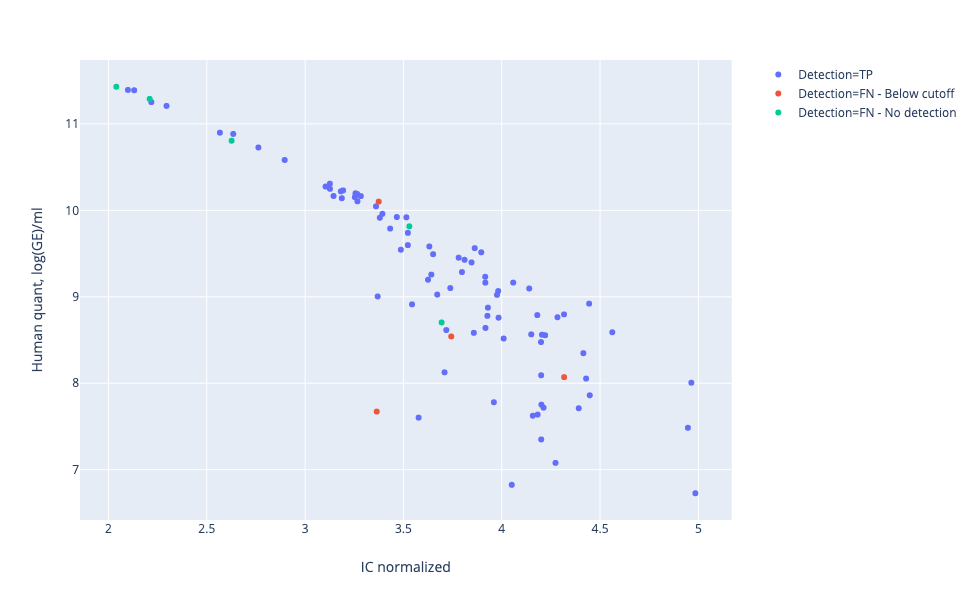

In [61]:
px.scatter(report_plot.reset_index(), x='IC normalized', y='Human quant, log(GE)/ml', hover_data=['Accession'],
           color='Detection')

In [74]:
report.to_csv('arup_urine_bacterial_human_quant.csv')